In [1]:
import yahoo
import pandas as pd

In [12]:
puts = pd.read_csv('outputs/puts_output.csv')
calls = pd.read_csv('outputs/calls_output.csv')

data = pd.concat([puts, calls])

data['SD/MA'] = data['STD']/data['MA']
data['Short SD/MA'] = data['3-STD']/data['3-MA']
data['% MA to adj'] = ((data['adjclose']/data['MA'])-1).apply(lambda x: abs(x))
data['Short % MA to adj'] = ((data['adjclose']/data['3-MA'])-1).apply(lambda x: abs(x))
data['% ADJ to Strike'] = ((data['Strike']/data['adjclose'])-1).apply(lambda x: abs(x))
data[['Ticker','Safe','SD/MA','% MA to adj','% ADJ to Strike', 'Return']]

,Ticker,Safe,SD/MA,% MA to adj,% ADJ to Strike,Return
0,AAL,1.0,0.049783,0.054991,0.052347,0.020000
1,MGM,0.0,0.041441,0.001399,0.050027,0.022581
2,AAL,0.0,0.069410,0.173653,0.107143,0.012800
3,DKNG,1.0,0.065940,0.077343,0.114204,0.019643
4,KODK,0.0,1.003721,0.111698,0.720410,0.020000
...,...,...,...,...,...,...
174,UAL,0.0,0.054372,0.172531,0.152953,0.238000
175,AMC,1.0,0.177233,0.304928,0.061008,0.127500
176,AMC,1.0,0.153487,0.089771,0.286174,0.017500
177,AMC,1.0,0.166065,0.315954,0.049869,0.017500


In [3]:
#calls first
from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(data[['Safe','SD/MA','% MA to adj','% ADJ to Strike', 'Return']], data['Assigned'], test_size=0.15, random_state=42)


In [4]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
def plot_metric(clf, testX, testY, name):
    """
    Small function to confusion matrix
    """
    plt.style.use('ggplot')
    plot_confusion_matrix(clf, testX, testY, normalize='true')
    plt.title(f"Confusion Matrix [{name}]")

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(trainX, trainY)
print(f"Validation Accuracy of Random Forest Classifier is: {(rf_classifier.score(validX, validY))*100:.2f}%")

Validation Accuracy of Random Forest Classifier is: 87.88%


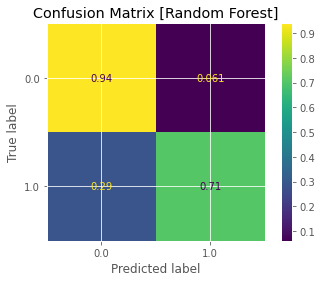

In [6]:
plot_metric(rf_classifier, validX, validY, "Random Forest")

In [7]:
rf_classifier.feature_importances_

array([0.03227928, 0.18143905, 0.1831264 , 0.33264663, 0.27050864])

In [13]:
import numpy as np
sample_test = np.array([0,0.583691767213275/11.7247619174776, (11.0799999237061/11.7247619174776)-1, (10.5/11.0799999237061)-1,0.1])
#sample_test.reshape(1,-1)

In [14]:
rf_classifier.predict(sample_test.reshape(1,-1))

array([1.])

In [10]:
rf_classifier.predict(validX)

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [11]:
validY.values

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

In [12]:
rf_classifier.predict(validX) == validY.values

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])

In [13]:
(validY.values == 1) == (rf_classifier.predict(validX) != validY.values)

array([ True,  True,  True,  True, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [14]:
validX['Return']

4      0.010714
78     0.011316
86     0.003750
255    0.016410
66     0.030000
         ...   
93     0.012211
28     0.011875
135    0.000755
24     0.013542
165    0.007647
Name: Return, Length: 66, dtype: float64